#### Previsão de Cancelamento 

O trabalho tem como objetivo desenvolver um modelo preditivo capaz de prever o cancelamento de uma empresa de serviços de telecomunicações com base em dados históricos de clientes. Essa previsão pode fornecer insights para a empresa, permitindo que ela tome medidas para reter clientes em risco de cancelamento.

Descrição do Problema: A empresa de telecomunicações está enfrentando um desafio significativo em relação à perda de clientes. A fim de reduzir o churn (cancelamento), é essencial identificar os fatores que iniciaram para essa decisão e desenvolver um modelo que seja capaz de prever quais clientes estão mais tolerantes a cancelar seus serviços.

Objetivo: Desenvolvido com fins de estudo e prática, utiliza uma base de dados administrada no Kaggle. Análisar os dados e aplicar técnicas de aprendizado de máquina para desenvolver um modelo de previsão .

link do dataset: https://raw.githubusercontent.com/Ninjalemur/telecom_users/main/telecom_users.csv

#### Import das bibliotecas

In [316]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option('display.max_columns', None)
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [317]:
# Importar os dados e ver o seu tamanho

df = pd.read_csv('telecom_users.csv')
df.shape

(5986, 23)

In [318]:
# Primeiras linhas do dataset
df.head(6)

,Unnamed: 0,IDCliente,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,ServicoSegurancaOnline,ServicoBackupOnline,ProtecaoEquipamento,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn,Codigo
0,1869,7010-BRBUU,Masculino,0,Sim,Sim,72,Sim,Sim,Nao,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao,NaN
1,4528,9688-YGXVR,Feminino,0,Nao,Nao,44,Sim,Nao,Fibra,Nao,Sim,Sim,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.2,Nao,NaN
2,6344,9286-DOJGF,Feminino,1,Sim,Nao,38,Sim,Sim,Fibra,Nao,Nao,Nao,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim,NaN
3,6739,6994-KERXL,Masculino,0,Nao,Nao,4,Sim,Nao,DSL,Nao,Nao,Nao,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.5,Nao,NaN
4,432,2181-UAESM,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.5,Nao,NaN
5,2215,4312-GVYNH,Feminino,0,Sim,Nao,70,Nao,SemTelefone,DSL,Sim,Nao,Sim,Sim,Nao,Sim,2 anos,Sim,DebitoAutomatico,49.85,3370.2,Nao,NaN


#### Descrição das variaveis da base
- Gênero: O gênero do cliente (Masculino ou Feminino).
- Aposentado: Indica se o cliente é aposentado (0 para não, 1 para sim).
- Casado: Indica se o cliente é casado (Sim ou Não).
- Dependentes: Indica se o cliente possui dependentes (Sim ou Não).
- MesesComoCliente: O número de meses que o cliente está com a empresa.
- ServicoTelefone: Indica se o cliente possui serviço de telefone (Sim ou Não).
- MultiplasLinhas: Indica se o cliente possui múltiplas linhas telefônicas (Sim ou Não).
- ServicoInternet: O tipo de serviço de internet do cliente (DSL, Fibra ou Sem Internet).
- ServicoSegurancaOnline: Indica se o cliente possui serviço de segurança online (Sim ou Não).
- ServicoBackupOnline: Indica se o cliente possui serviço de backup online (Sim ou Não).
- ProteçãoEquipamento: Indica se o cliente possui proteção para equipamentos (Sim ou Não).
- ServicoSuporteTecnico: Indica se o cliente possui serviço de suporte técnico (Sim ou Não).
- ServicoStreamingTV: Indica se o cliente possui serviço de streaming de TV (Sim ou Não).
- ServicoFilmes: Indica se o cliente possui serviço de filmes (Sim ou Não).
- TipoContrato: O tipo de contrato do cliente (Mensal, Anual ou 2 anos).
- FaturaDigital: Indica se o cliente optou pela fatura digital (Sim ou Não).
- FormaPagamento: Uma forma de pagamento do cliente (Cartão de Crédito, Débito Automático, Boleto Eletrônico ou Boleto Impresso).
- ValorMensal: O valor mensal pago pelo cliente.
- TotalGasto: O total gasto pelo cliente durante o período de tempo.
- Churn: Indica se o cliente cancelou o serviço (Sim ou Não).


In [319]:
#Alteração para melhor entendimento 
df['Churn'] = df['Churn'].replace({'Sim': 'Cancelado', 'Nao': 'Ativo'})

In [320]:
# Informações dos dados, tipos e dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5986 non-null   int64  
 1   IDCliente               5986 non-null   object 
 2   Genero                  5986 non-null   object 
 3   Aposentado              5986 non-null   int64  
 4   Casado                  5986 non-null   object 
 5   Dependentes             5985 non-null   object 
 6   MesesComoCliente        5986 non-null   int64  
 7   ServicoTelefone         5986 non-null   object 
 8   MultiplasLinhas         5986 non-null   object 
 9   ServicoInternet         5986 non-null   object 
 10  ServicoSegurancaOnline  5986 non-null   object 
 11  ServicoBackupOnline     5986 non-null   object 
 12  ProtecaoEquipamento     5986 non-null   object 
 13  ServicoSuporteTecnico   5986 non-null   object 
 14  ServicoStreamingTV      5986 non-null   

#### A principio algumas informaçoes de algumas variaveis :
- Coluna Unnamed0 não apresenta nenhuma informaçao relevante . Será descartada .
- ID Cliente tambem nao tras informaçao relevante para a análise, aparentemente algum tipo de codigo interno para identificaçao do cliente.
- Aposentado está com 0 ou 1 onde 0 é nao aposentado e 1 é aposentado .
- TotalGasto tem seu conteudo numerico mas está com tipo object, provavelmente tem algum caractere diferente de numeros. Será tratada e alterada para float, visto que representa o valor total gasto do cliente .
- Churn a variavel alvo do modelo .
- Coluna Codigo não apresenta informaçao nenhuma, será excluída .

In [321]:
# Exclusão das colunas
df.drop(['Unnamed: 0', 'IDCliente', 'Codigo'], axis=1, inplace=True)
df.shape

(5986, 20)

- A variavel TotalGasto apresentava caracteres nao numericos, alguns caracteres especiais que tinham que ser removidos para aceitar a alteraçao do seu tipo .

In [322]:
# Remoção de caracteres que nao sejam digitos, ponto ou virgula. E substituição dos valores inválidos por sua mediana.

# Remoção caracteres não numéricos da coluna "TotalGasto"
df['TotalGasto'] = df['TotalGasto'].apply(lambda x: re.sub(r'[^0-9.,]', '', str(x)))

# Substituição dos valores inválidos por NaN
df['TotalGasto'] = df['TotalGasto'].replace('', np.nan)

# Converção da coluna "TotalGasto" para float
df['TotalGasto'] = df['TotalGasto'].astype(float)

# Substituição dos valores inválidos pela mediana
mediana = df['TotalGasto'].median()
df['TotalGasto'].fillna(mediana, inplace=True)

print(df.dtypes)

Genero                     object
Aposentado                  int64
Casado                     object
Dependentes                object
MesesComoCliente            int64
ServicoTelefone            object
MultiplasLinhas            object
ServicoInternet            object
ServicoSegurancaOnline     object
ServicoBackupOnline        object
ProtecaoEquipamento        object
ServicoSuporteTecnico      object
ServicoStreamingTV         object
ServicoFilmes              object
TipoContrato               object
FaturaDigital              object
FormaPagamento             object
ValorMensal               float64
TotalGasto                float64
Churn                      object
dtype: object


In [323]:
#Resumo estatistico
df.describe()

,Aposentado,MesesComoCliente,ValorMensal,TotalGasto
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2296.580647
std,0.367909,24.516391,30.114702,2272.514574
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,406.275000
50%,0.000000,29.000000,70.400000,1412.150000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


In [324]:
# Verificar dados ausentes
print(df.isnull().sum())
df=df.dropna()

Genero                    0
Aposentado                0
Casado                    0
Dependentes               1
MesesComoCliente          0
ServicoTelefone           0
MultiplasLinhas           0
ServicoInternet           0
ServicoSegurancaOnline    0
ServicoBackupOnline       0
ProtecaoEquipamento       0
ServicoSuporteTecnico     0
ServicoStreamingTV        0
ServicoFilmes             0
TipoContrato              0
FaturaDigital             0
FormaPagamento            0
ValorMensal               0
TotalGasto                0
Churn                     1
dtype: int64


Poucos dados ausentes. Como tem apenas uma entrada sem valor, foi deletado pois nao tem grande impacto em ralaçao ao dataset como todo para o modelo .

In [325]:
# Verificar os valores unicos
df.nunique()

Genero                       2
Aposentado                   2
Casado                       2
Dependentes                  2
MesesComoCliente            73
ServicoTelefone              2
MultiplasLinhas              3
ServicoInternet              3
ServicoSegurancaOnline       3
ServicoBackupOnline          3
ProtecaoEquipamento          3
ServicoSuporteTecnico        3
ServicoStreamingTV           3
ServicoFilmes                3
TipoContrato                 3
FaturaDigital                2
FormaPagamento               4
ValorMensal               1526
TotalGasto                5609
Churn                        2
dtype: int64

## Análise variaveis categoricas

In [326]:
var_categoricas = df.select_dtypes(include=['object', 'category'])
print(list(var_categoricas))

['Genero', 'Casado', 'Dependentes', 'ServicoTelefone', 'MultiplasLinhas', 'ServicoInternet', 'ServicoSegurancaOnline', 'ServicoBackupOnline', 'ProtecaoEquipamento', 'ServicoSuporteTecnico', 'ServicoStreamingTV', 'ServicoFilmes', 'TipoContrato', 'FaturaDigital', 'FormaPagamento', 'Churn']


### Generos, estado civil e dependentes

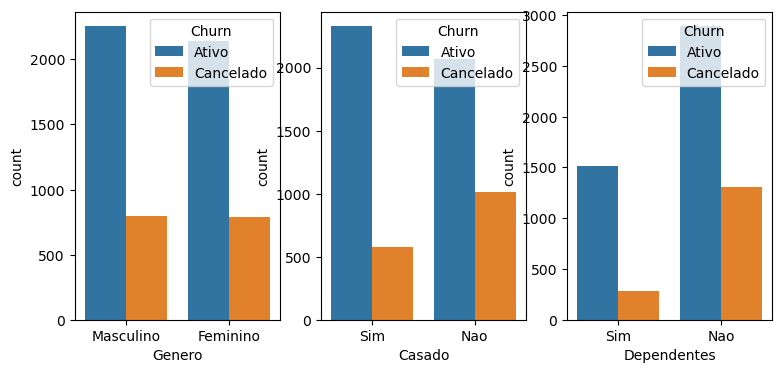

In [327]:
x, axes = plt.subplots(1,3, figsize=(9, 4))
sns.countplot(data=df, x='Genero', hue='Churn', ax=axes[0])
sns.countplot(data=df, x='Casado', hue='Churn', ax=axes[1])
sns.countplot(data=df, x='Dependentes', hue='Churn', ax=axes[2])
plt.show()

Análisando o perfil dos clientes em relação ao estado civil e a presença de dependentes, clientes que não são casados e não possuem dependentes apresentam um índice de cancelamento que merece atenção.
 
Clientes solteiros e sem dependentes podem ter demandas diferentes daqueles que são casados ou têm filhos. É possível que esses clientes valorizem flexibilidade, preços competitivos ou serviços personalizados. Compreender suas intenções e expectativas específicas é importante para adaptar ofertas e melhorar sua experiência geral com os serviços.
 
É importante considerar que esses grupos especificos podem ter um maior nível de mobilidade e estar mais sujeitos a considerar diferentes opções e fornecedores de serviços. Portanto, é fundamental desenvolver estratégias de retenção que sejam atraentes e diferenciadas para esse grupo específico de clientes.

### Tipos de serviços x Churn

Para uma análise dos tipos de serviço para o cliente serao separadas as opçoes de serviçoes e plotadas em relaçao ao seus devidos cancelamentos .

Algumas variaveis apresentam valores desnecessarios, uma certa redundancia de dados que nao fazem muito sentido e serao agrupadas .

ServicoSegurancaOnline, ServicoBackupOnline, ProtecaoEquipamento, ServicoSuporteTecnico, ServicoStreamingTV, ServicoFilmes precisam dar a informaçao se o cliente tem ou nao o serviço, logo precisaria das opçoes sim ou nao, porem ela tem um tipo de dados a mais "sem internet" que basicamente diz que o cliente nao tem o serviço . E ja existe na base de dados a variavel que diz se o cliente tem o serviço de internet.  Essas informaçoes serao atribuidas a 'nao' .

In [328]:
# Separar os tipos de serviços disponiveis
servicos = df[['ServicoTelefone', 'ServicoInternet', 'ServicoSegurancaOnline', 'ServicoBackupOnline','ServicoSuporteTecnico', 'ServicoStreamingTV', 'ServicoFilmes']]

#Alteraçao dos dados
alt_col = ['ServicoSegurancaOnline', 'ServicoBackupOnline', 'ProtecaoEquipamento', 'ServicoSuporteTecnico', 'ServicoStreamingTV', 'ServicoFilmes']
df[alt_col] = df[alt_col].replace('SemInternet', 'Nao')

df['ServicoSegurancaOnline'].unique() #Verificando as opçoes 

array(['Nao', 'Sim'], dtype=object)

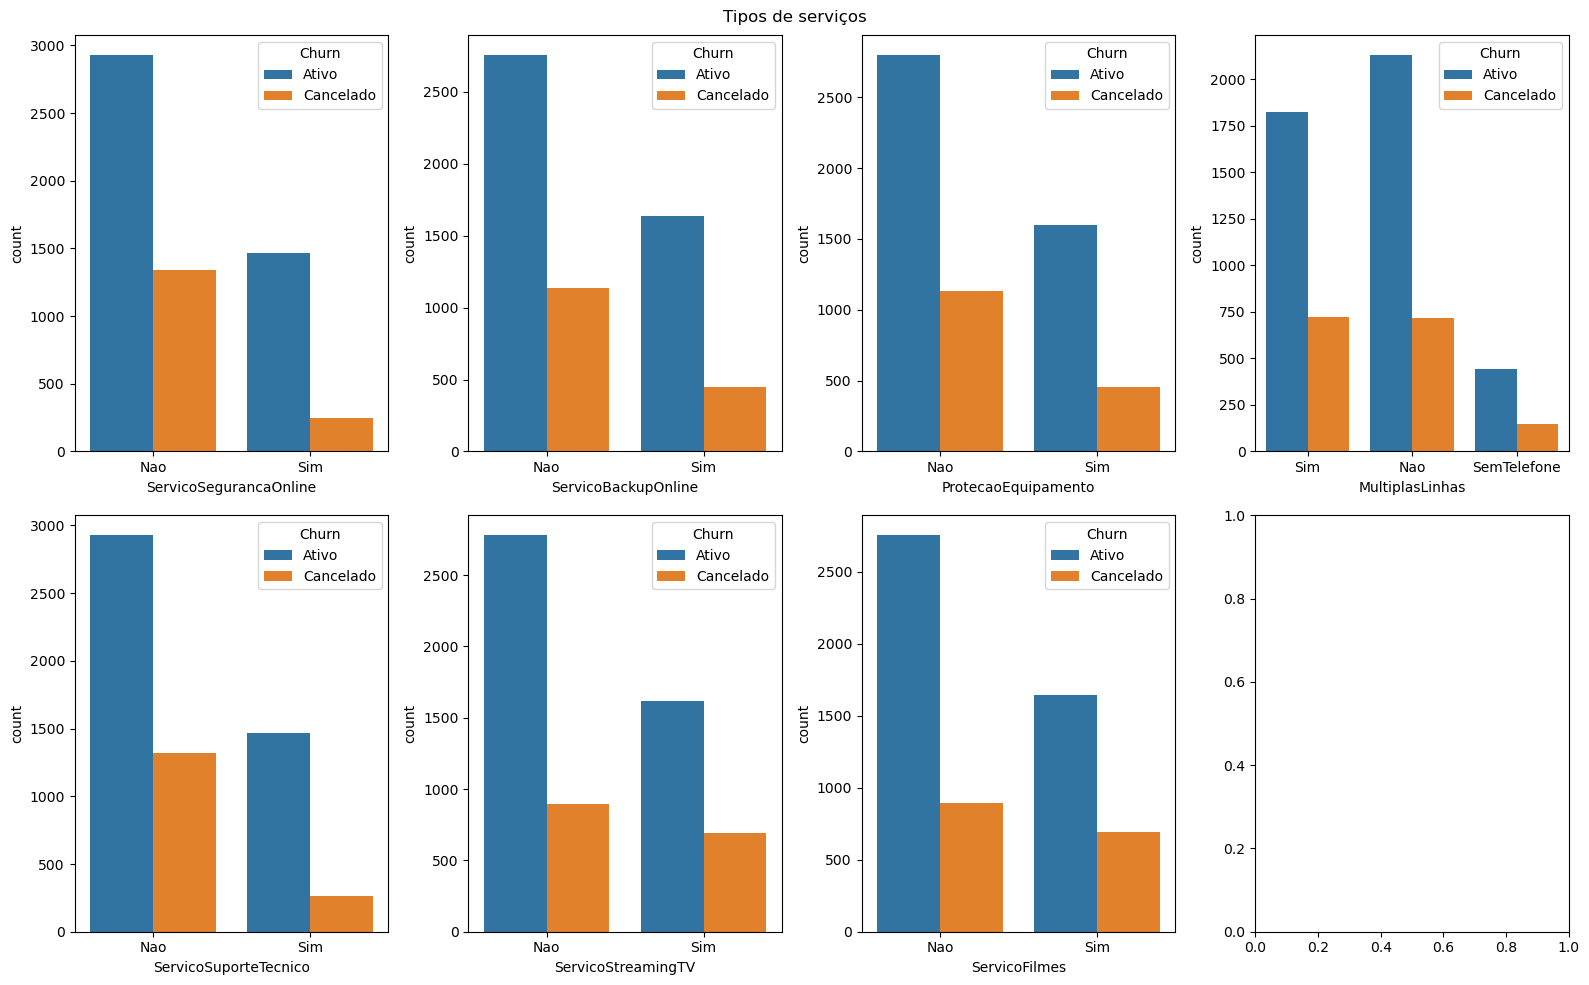

In [329]:
x, axes = plt.subplots(2, 4, figsize=(16, 10))

sns.countplot(data=df, x='ServicoSegurancaOnline', hue='Churn', ax=axes[0, 0])
sns.countplot(data=df, x='ServicoBackupOnline', hue='Churn', ax=axes[0, 1])
sns.countplot(data=df, x='ProtecaoEquipamento', hue='Churn', ax=axes[0, 2])
sns.countplot(data=df, x='MultiplasLinhas', hue='Churn', ax=axes[0, 3])

sns.countplot(data=df, x='ServicoSuporteTecnico', hue='Churn', ax=axes[1, 0])
sns.countplot(data=df, x='ServicoStreamingTV', hue='Churn', ax=axes[1, 1])
sns.countplot(data=df, x='ServicoFilmes', hue='Churn', ax=axes[1, 2])

plt.suptitle('Tipos de serviços')
plt.tight_layout()  
plt.show()

Podemos observar alguns padrões interessantes. Notavelmente, três tipos de serviços se destacam com uma contagem alta de cancelamentos por parte dos clientes: Serviço de Segurança Online, Serviço de Backup Online e Serviço de Suporte Técnico.
A contagem de cancelamento dos clientes que NAO tem esses serviços sao consideravelmentes elevadas, passam de mil clientes .

Isso sugere que a ausencia desses serviços pode não estar atendendo às expectativas dos clientes ou não está sendo percebido como uma vantagem significativa.

A contagem de cancelamentos é notavelmente maior para os clientes que não utilizam esses serviços específicos. Isso indica que a ausência deles podem estar desempenhando um papel significativo na decisão de cancelar o plano por parte dos clientes.

Isso sugere que esses serviços são percebidos como importantes e desejáveis pelos clientes, e a falta deles pode levar à insatisfação ou a uma experiência inferior.

A empresa pode considerar estratégias para promover esses serviços, comunicando seus benefícios e valor agregado, a fim de incentivar os clientes a aderirem a eles e, assim, reduzir a taxa de cancelamento.

### Tipos de contratos, Fatura digital e Formas de pagamentos

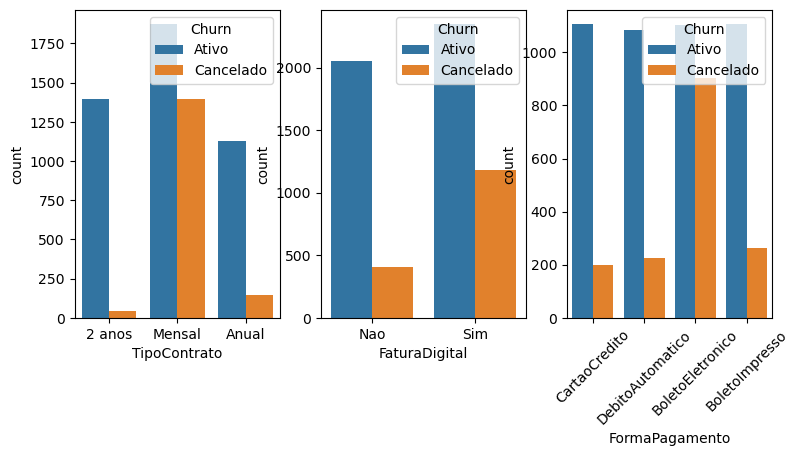

In [330]:
x, axes = plt.subplots(1,3, figsize=(9, 4))

sns.countplot(data=df, x='TipoContrato', hue='Churn', ax=axes[0])
sns.countplot(data=df, x='FaturaDigital', hue='Churn', ax=axes[1])
sns.countplot(data=df, x='FormaPagamento', hue='Churn', ax=axes[2])
plt.xticks(rotation=45)
plt.show()

Algumas variáveis que se destacam, são elas o tipo de contrato e a forma de pagamento.

O tipo de contrato apresenta uma alta taxa de cancelamento no tipo mensal. Isso sugere que os clientes que optam por contratos menores estão mais inclinados a cancelar os serviços. Compreender os motivos que levam a esse comportamento é fundamental para reter esses clientes e incentivá-los a escolher contratos mais longos, como semestrais ou anuais, que podem trazer benefícios tanto para eles quanto para a empresa. Por exemplo algum tipo de desconto ou serviço extra para contratos mais longos

Outro fator relevante é a forma de pagamento escolhida pelos clientes. A taxa de cancelamento é significativamente alta para aqueles que optam pelo boleto eletrônico como forma de pagamento. Essa informação nos permite investigar se existem problemas operacionais ou de experiência do cliente relacionados a essa opção de pagamento. É importante considerar alternativas ou melhorias para oferecer um processo de pagamento mais conveniente e seguro, a fim de reduzir o churn associado a essa forma de pagamento específica.

Essas informações revelam a importância de direcionar atenção e recursos para entender as razões por trás dessas altas taxas de cancelamento. Com base na análise, concentrar esforços em melhorar a qualidade ou o valor desses serviços específicos, a fim de minimizar o churn e aumentar a satisfação dos clientes.

<AxesSubplot:xlabel='Churn', ylabel='count'>

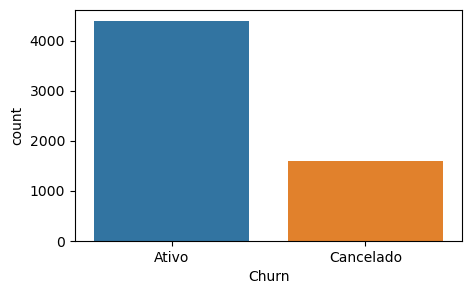

In [331]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Churn')

In [332]:
# Separar variaveis numericas
var_numericas = df.select_dtypes(include=['int', 'float'])
print(list(var_numericas))

['Aposentado', 'MesesComoCliente', 'ValorMensal', 'TotalGasto']


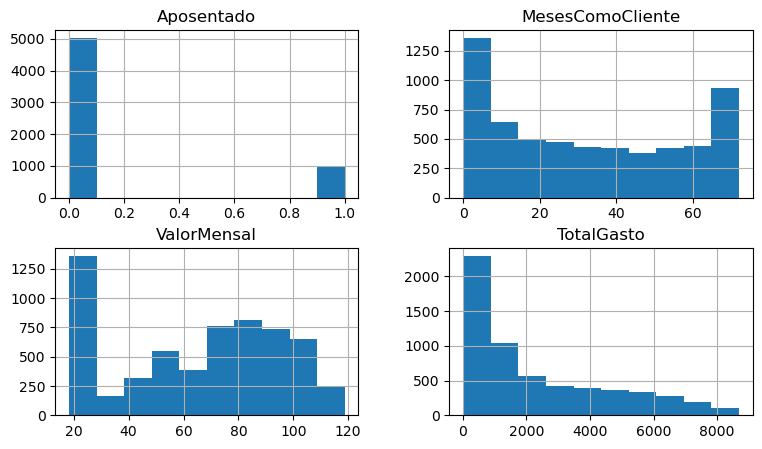

In [333]:
var_numericas.hist(figsize=(9,5))
plt.show()

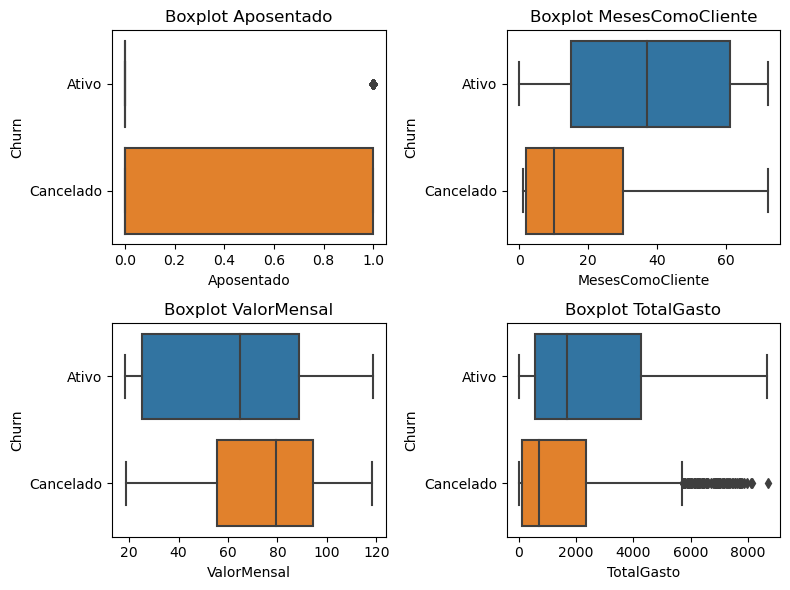

In [334]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

sns.boxplot(ax=axes[0, 0], x='Aposentado', y='Churn', data=df)
sns.boxplot(ax=axes[0, 1], x='MesesComoCliente', y='Churn', data=df)
sns.boxplot(ax=axes[1, 0], x='ValorMensal', y='Churn', data=df)
sns.boxplot(ax=axes[1, 1], x='TotalGasto', y='Churn', data=df)

axes[0, 0].set_xlabel('Aposentado')
axes[0, 0].set_ylabel('Churn')
axes[0, 0].set_title('Boxplot Aposentado')

axes[0, 1].set_xlabel('MesesComoCliente')
axes[0, 1].set_ylabel('Churn')
axes[0, 1].set_title('Boxplot MesesComoCliente')

axes[1, 0].set_xlabel('ValorMensal')
axes[1, 0].set_ylabel('Churn')
axes[1, 0].set_title('Boxplot ValorMensal')

axes[1, 1].set_xlabel('TotalGasto')
axes[1, 1].set_ylabel('Churn')
axes[1, 1].set_title('Boxplot TotalGasto')

plt.tight_layout()
plt.show()

Os valores em total gasto apresentam muitos outliers em clientes cancelados, provavelmente parcelas vencidas ou em atraso, o que podem justificar seus cancelamentos . Valores altos possivelmente clientes com atrasos que cancelaram seus planos mas o sistema continua gerando multas a devida inadimplencia .

As outras variaveis aparentemente bem balanceadas .

## Encoding

In [335]:
print(list(var_categoricas))

['Genero', 'Casado', 'Dependentes', 'ServicoTelefone', 'MultiplasLinhas', 'ServicoInternet', 'ServicoSegurancaOnline', 'ServicoBackupOnline', 'ProtecaoEquipamento', 'ServicoSuporteTecnico', 'ServicoStreamingTV', 'ServicoFilmes', 'TipoContrato', 'FaturaDigital', 'FormaPagamento', 'Churn']


In [336]:
# # Aplicar o método dummies em colunas específicas
# colunas_dummies = ['Genero', 'Casado', 'Dependentes', 'ServicoTelefone', 'MultiplasLinhas', 'ServicoInternet', 'ServicoSegurancaOnline', 'ServicoBackupOnline', 'ProtecaoEquipamento', 'ServicoSuporteTecnico', 'ServicoStreamingTV', 'ServicoFilmes', 'TipoContrato', 'FaturaDigital', 'FormaPagamento', 'Churn']
# df = pd.get_dummies(df, columns=colunas_dummies)

# df.head(8)

In [337]:
lb = LabelEncoder()

for coluna in var_categoricas:
    df[coluna] = lb.fit_transform(df[coluna])
    
df.head(8)

,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,ServicoSegurancaOnline,ServicoBackupOnline,ProtecaoEquipamento,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn
0,1,0,1,1,72,1,2,2,0,0,0,0,0,0,0,0,2,24.10,1734.65,0
1,0,0,0,0,44,1,0,1,0,1,1,0,1,0,2,1,2,88.15,3973.20,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,2,1,3,74.95,2869.85,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,1,2,1,0,55.90,238.50,0
4,1,0,0,0,2,1,0,0,1,0,1,0,0,0,2,0,0,53.45,119.50,0
5,0,0,1,0,70,0,1,0,1,0,1,1,0,1,0,1,3,49.85,3370.20,0
6,0,0,0,0,33,1,2,1,1,0,0,0,0,1,2,1,0,90.65,2989.60,0
7,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,1,1,24.90,24.90,0


#### Verificar o balanceamento da variavel target.

Apos o encoder 0 para ativo 1 para cancelado

O balanceamento da variável target em um modelo preditor é crucial para evitar vieses e garantir resultados precisos. Equilibrar ajuda a capturar melhor a representatividade dos dados, resultando em previsões mais justas e confiáveis.

<AxesSubplot:>

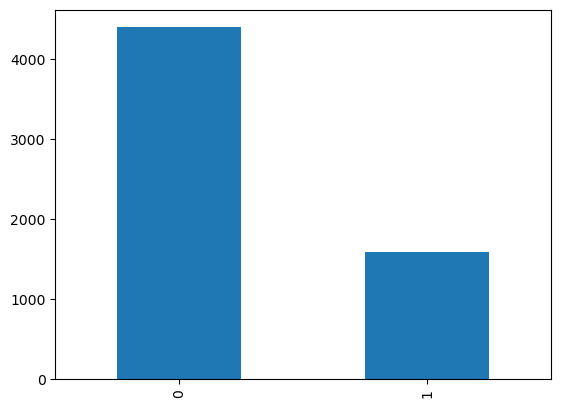

In [338]:
df.Churn.value_counts().plot(kind='bar')

In [339]:
# Separar as variaveis preditoras e o target

X = df.drop('Churn', axis=1)
y = df['Churn']

<AxesSubplot:>

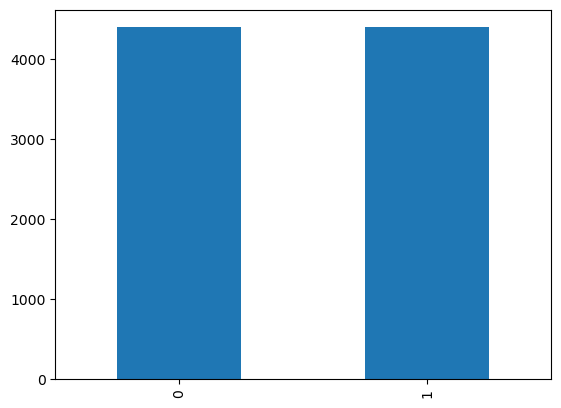

In [340]:
# Balancear a variavel target

balanceador = SMOTE(random_state=100)

X_res, y_res = balanceador.fit_resample(X,y)

y_res.value_counts().plot(kind='bar')

In [341]:
print(f'Preditoras antes do balanceamento: {X.shape}')
print(f'Target antes do balanceamento: {y.shape}')
print(f'Preditoras antes do balanceamento: {X_res.shape}')
print(f'Target antes do balanceamento: {y_res.shape}')

Preditoras antes do balanceamento: (5984, 19)
Target antes do balanceamento: (5984,)
Preditoras antes do balanceamento: (8794, 19)
Target antes do balanceamento: (8794,)


Após o balanceamento, mesma quantidade de dados .




#### Aplicação do modelo

- Modelos a serem testados:
     - Regressao Logística e Random Forest, modelos adequados para lidar com problemas binários, com duas categorias distintas.

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


lg = LogisticRegression()           

lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)

acuracia = accuracy_score(y_test, y_pred)
print("Acurácia da regressão logística:", acuracia)

Acurácia da regressão logística: 0.8037135278514589


In [343]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Acurácia do Random Forest:", accuracy_rf)

Acurácia do Random Forest: 0.834785903751421


Resultados: Após avaliar os modelos, o Random Forest obteve o melhor desempenho para prever o churn na análise de dados. O modelo Random Forest demonstrou uma acurácia mais alta em comparação com o outro modelo testado. 

A aplicação de técnicas de análise de dados e machine learning pode fornecer previsões precisas e abre caminho para implementações futuras, como a criação de uma solução de deploy e exploração de técnicas de interpretabilidade do modelo.
